# Akshay Parkala - aparkala@scu.edu

##### My analysis is on 1st division spanish soccer league. The dataset contains all the matches played in both 1 & 2 divisions since 1970.

## Dataset:

The dataset consists of all the matches played in the first and second division spanish soccer leagues. The column description is as follows:

link: https://www.kaggle.com/ricardomoya/football-matches-of-spanish-league

### Columns: <br>
*id*          : A unique id assigned to each match <br><br>
*season*      : The season in which the match was played (ex: 1970-71)<br><br>
*division*    : The divison to which the match belonged (1 or 2)<br><br>
*round*       : A round contains one match between each pair of teams (N teams, N/2 matches/round). There are 
(N-1)\*2 rounds in a division. (ex: N = 20 teams. 1 team has to play against N-1 = 19 teams twice, once at home ground and once at away ground. Therefore, number of rounds = (N-1)\*2 = 38 rounds)<br><br>
*localTeam*   : The home team<br><br>
*visitorTeam* : The away team<br><br>
*localGoals*  : The number of goals scored by the home team in the game<br><br>
*visitorGoals*: The number of goals scored by the away team in the game<br><br>
*date*        : The date when the match took place<br><br>
*timestamp*   : The timestamp when the match started (assumption)<br><br>

## Data Preperation:

### 1) Lets import the dataset

In [1]:
from datetime import datetime
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spanish_soccer = pd.read_csv('FMEL_dataset.csv')

In [3]:
spanish_soccer.shape

(37147, 10)

In [4]:
spanish_soccer.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


In [5]:
spanish_soccer.describe()

,id,division,round,localGoals,visitorGoals,timestamp
count,37147.000000,37147.000000,37147.000000,37147.000000,37147.000000,3.714700e+04
mean,18574.000000,1.537809,19.862896,1.515385,0.936953,8.116889e+08
std,10723.559561,0.498575,11.282774,1.262742,1.010263,4.322134e+08
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.133360e+07
25%,9287.500000,1.000000,10.000000,1.000000,0.000000,4.453884e+08
50%,18574.000000,2.000000,20.000000,1.000000,1.000000,8.317656e+08
75%,27860.500000,2.000000,29.000000,2.000000,1.000000,1.181426e+09
max,37147.000000,2.000000,44.000000,10.000000,8.000000,1.527890e+09


In [6]:
spanish_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37147 entries, 0 to 37146
Data columns (total 10 columns):
id              37147 non-null int64
season          37147 non-null object
division        37147 non-null int64
round           37147 non-null int64
localTeam       37147 non-null object
visitorTeam     37147 non-null object
localGoals      37147 non-null int64
visitorGoals    37147 non-null int64
date            37147 non-null object
timestamp       37147 non-null int64
dtypes: int64(6), object(4)
memory usage: 2.8+ MB


In [7]:
spanish_soccer.isnull().any()

id              False
season          False
division        False
round           False
localTeam       False
visitorTeam     False
localGoals      False
visitorGoals    False
date            False
timestamp       False
dtype: bool

In [9]:
spanish_soccer['localTeam'].size()

TypeError: 'int' object is not callable

### 2) The data set is then filtered with division==1 since my analysis is only on the 1st division data

In [10]:
laliga = spanish_soccer[spanish_soccer['division']==1].copy()
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970-71,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970-71,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970-71,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970-71,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970-71,1,1,Elche,Granada,1,1,13/09/1970,22024800


localTeam
Atletico de Bilbao    885
Barcelona             885
Real Madrid           885
Valencia              863
dtype: int64

### 3) Converting format of season from 1970-71 to 1970 forease of computation, therefore a season value of yyyy is actually yyyy-yy+1

In [9]:
laliga.season=laliga.season.apply(lambda x: int(x.split("-")[0]))
laliga.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,1,1970,1,1,Atletico de Bilbao,Barcelona,1,1,12/09/1970,21938400
1,2,1970,1,1,Las Palmas,Atletico de Madrid,1,1,12/09/1970,21938400
2,3,1970,1,1,Real Madrid,Valencia,2,0,12/09/1970,21938400
3,4,1970,1,1,Celta de Vigo,Sporting de Gijon,2,0,13/09/1970,22024800
4,5,1970,1,1,Elche,Granada,1,1,13/09/1970,22024800


### 4) Missing Data:

During analysis, I found out that a record for a match in the season 1979-80 CD Malaga vs AD Almeria was missing. 

![](missing.png)

In [10]:
from datetime import date
laliga.loc[36685]=[36686,1979,1,27,'CD Malaga','AD Almeria',0,1,laliga[(laliga['season']==1979) & (laliga['round']==27)]['date'].iloc[0],0]
laliga.tail()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
36681,36682,2017,1,38,Atletico de Bilbao,Espanol,0,1,20/05/2018,1526767200
36682,36683,2017,1,38,Barcelona,Real Sociedad,1,0,20/05/2018,1526767200
36683,36684,2017,1,38,Valencia,Deportivo,2,1,20/05/2018,1526767200
36684,36685,2017,1,38,Atletico de Madrid,Eibar,2,2,20/05/2018,1526767200
36685,36686,1979,1,27,CD Malaga,AD Almeria,0,1,29/03/1980,0


## Pattern / Fact 1:

### Productivity of a round follows an upward trend as the season comes to an end

#### Productivity of a round = number of goals scored/match in that round
A season usually spans from August to May of the next year. The players are given a summer break of 3 months to rejuvenate from all the fatigue. You may naturally assume that the productivity of a matchday would be high during the start of the season and would follow a downward trend since fatigue would naturally cause productivity to decrease. 

But upon analysis, I observed that against all odds, as seasons progress towards the business end, the productivity of a matchday gradually increases (higher number of goals are scored per round per match towards the end of the season)! 

This reiterates the fact that the mind is stronger than the body: the fruits of playing hard throughout the season are only awarded at the end of it, and therefore players work harder to bring their hardhsips to fruition.

### Data preperation

In [11]:
df1 = laliga.copy()

# we will need to calculate total goals scored in each match for ease of computation
df1['totalGoals'] = df1['localGoals'] + df1['visitorGoals']

# group by round gives us a df which holds data on each match played in the round
# mean on totalGoals would give us the average goals scored per match in that round
goals_scored_by_round = df1[['round','totalGoals']].groupby('round').mean()['totalGoals'].reset_index()


### Data Analysis

Linear regression code referenced from:
https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

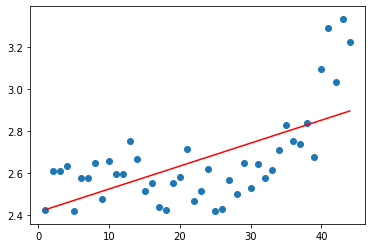

In [12]:
# I used linear regression to fit a line between (goals scored per match) and the (round) across all seasons

from sklearn.linear_model import LinearRegression

X = goals_scored_by_round.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = goals_scored_by_round.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Round and totalGoals scored per match are strongly correlated with an upward trend

In [13]:
goals_scored_by_round.corr()

,round,totalGoals
round,1.000000,0.628095
totalGoals,0.628095,1.000000


## Pattern / Fact 2:

In 1973-74 season, Barcelona maintained an average position of 5 out of 18 on the points table across all the rounds... and still managed to win the league!

### Data preperation

<b>We will need to calculate the points table across all the rounds in a season</b>

<b>Points table column description</b>:<br><br>
*season*         : Season of points table(1970-2017).<br><br>
*round*          : Round of the points table(1-30,1-34,1-38,1-40,1-42).<br><br>
*club*           : Name of the club.<br><br>
*matches_won*    : Number of matches won until that round in that season.<br><br>
*matches_lost*   : Number of matches lost until that round in that season.<br><br>
*matches_drawn*  : Number of matches drawn until that round in that season.<br><br>
*total_matches*  : Total number of matches played until that round in that season.<br><br>
*points*: Number of points gained until that round in that season(matches_won\*3 + matches_drawn\*1).<br><br>
*goals_scored*        : Total number of goals scored until that round in that season.<br><br>
*goals_conceded*   : Total number of goals conceded until that round in that season.<br><br>
*goal_difference*   : Difference of goals scored and goals conceded until that round in that season.<br><br>

In [14]:
# this functions returns the previous round deatils of a club in a season

def get_previous_round_det(club,rounds): #rounds is a list of dataframes which holds all the points tables per round
    
    # these are the details that need to be calculated after every match
    details_labels = ['matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
                          'points','goals_scored', 'goals_conceded',
                          'goal_difference']
    # details to be returned after calculation
    details = {
        'matches_won' : 0,
        'matches_lost' : 0,
        'matches_drawn' : 0,
        'total_matches' : 0,
        'points' : 0,
        'goals_scored' : 0,
        'goals_conceded' : 0,
        'goal_difference' : 0
        }
    
    # when its the first round of a season, the previous round details are all 0
    if len(rounds) == 0:
        return details
    
    
    else:
        
        # the previous round details are gotten from the points table of the last round present in rounds
        # index is set on club
        prev_round = rounds[len(rounds)-1][['club','matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
                          'points','goals_scored', 'goals_conceded',
                          'goal_difference']].set_index('club',drop=True)
        
        # the dataframe is then converted to a dictionary to access the details with ease
        # since club is the index of prev_round, to_dict() will return a dictionary with details(column) as keys
        # and details of each club(row) as values.
        details_each = prev_round.to_dict()
        
        # add the club's details to details_totals for each detail in dictionary
        for label in details_labels:
            details[label] += details_each[label][club]
                
        return details

In [15]:
# function to sort points table by points first and then by goal difference
def sort_point_table(point_table):
    point_table = point_table.sort_values(['points','goal_difference'],ascending=False)
    return point_table

# function to get ordered dictionary of points tables in a season for all the rounds in that season
def cumulative_point_table(matches):
    import collections
    
    season = int(matches.season.unique())
    
    # each key is a round and the value is a dataframe of points table for that round in that season
    rw_point_table_dict = collections.OrderedDict()
    
    #list of dataframes to hold round-wise point table which is passed to get_prev_round_details
    rw_point_table_list = []
    
    # for loop which iterates through each round of the season and enters the key,value pair of
    # (round,points table for that round) into 
    for i in range(int(matches['round'].min()),int(matches['round'].max())+1):
        
        # dataframe to hold points table for that round
        df2 = pd.DataFrame(data=None,columns = ['season', 'round', 'club','matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
       'points', 'goals_scored', 'goals_conceded',
       'goal_difference'])

        # loops through each match of the round and updates the points table df
        # each match is judged by localGoals and visitorGoals: 
        for match in matches[matches['round']==i].itertuples(): #iterates through each match of a round
            
            # get previous round details of home and visitor clubs involved in this match
            prev_round_totals_local = get_previous_round_det(match.localTeam,rw_point_table_list)
            prev_round_totals_visitor = get_previous_round_det(match.visitorTeam,rw_point_table_list)
            
            # goal difference wrt home club
            goal_diff_local = match.localGoals - match.visitorGoals
            
            # goal difference wrt visitor club
            goal_diff_visitor = match.visitorGoals - match.localGoals
            
            #list to hold updated points table records for both the clubs
            updated_rows = []
            
            # if local team wins
            if goal_diff_local > 0:
                updated_record_local = [season, i,match.localTeam,
                                        prev_round_totals_local['matches_won']+1,
                                        prev_round_totals_local['matches_lost'],
                                        prev_round_totals_local['matches_drawn'],
                                        prev_round_totals_local['total_matches']+1,
                                        prev_round_totals_local['points']+3,
                                        prev_round_totals_local['goals_scored']+match.localGoals,
                                        prev_round_totals_local['goals_conceded']+match.visitorGoals,
                                        prev_round_totals_local['goal_difference']+goal_diff_local
                                        ]
                updated_record_visitor = [season, i, match.visitorTeam,prev_round_totals_visitor['matches_won'],
                                        prev_round_totals_visitor['matches_lost']+1,
                                        prev_round_totals_visitor['matches_drawn'],
                                        prev_round_totals_visitor['total_matches']+1,
                                        prev_round_totals_visitor['points'],
                                        prev_round_totals_visitor['goals_scored']+match.visitorGoals,
                                        prev_round_totals_visitor['goals_conceded']+match.localGoals,
                                        prev_round_totals_visitor['goal_difference']+goal_diff_visitor
                                        ]
           
            # if visitor team wins    
            elif goal_diff_local < 0:
                updated_record_local = [season, i, match.localTeam,prev_round_totals_local['matches_won'],
                                        prev_round_totals_local['matches_lost']+1,
                                        prev_round_totals_local['matches_drawn'],
                                        prev_round_totals_local['total_matches']+1,
                                        prev_round_totals_local['points'],
                                        prev_round_totals_local['goals_scored']+match.localGoals,
                                        prev_round_totals_local['goals_conceded']+match.visitorGoals,
                                        prev_round_totals_local['goal_difference']+goal_diff_local
                                        ]
                updated_record_visitor = [season, i, match.visitorTeam,prev_round_totals_visitor['matches_won']+1,
                                        prev_round_totals_visitor['matches_lost'],
                                        prev_round_totals_visitor['matches_drawn'],
                                        prev_round_totals_visitor['total_matches']+1,
                                        prev_round_totals_visitor['points']+3,
                                        prev_round_totals_visitor['goals_scored']+match.visitorGoals,
                                        prev_round_totals_visitor['goals_conceded']+match.localGoals,
                                        prev_round_totals_visitor['goal_difference']+goal_diff_visitor
                                        ]
            
            # if match is a draw
            elif goal_diff_local == 0:
                updated_record_local = [season, i, match.localTeam,prev_round_totals_local['matches_won'],
                                        prev_round_totals_local['matches_lost'],
                                        prev_round_totals_local['matches_drawn']+1,
                                        prev_round_totals_local['total_matches']+1,
                                        prev_round_totals_local['points']+1,
                                        prev_round_totals_local['goals_scored']+match.localGoals,
                                        prev_round_totals_local['goals_conceded']+match.visitorGoals,
                                        prev_round_totals_local['goal_difference']+goal_diff_local
                                        ]
                updated_record_visitor = [season, i, match.visitorTeam,prev_round_totals_visitor['matches_won'],
                                        prev_round_totals_visitor['matches_lost'],
                                        prev_round_totals_visitor['matches_drawn']+1,
                                        prev_round_totals_visitor['total_matches']+1,
                                        prev_round_totals_visitor['points']+1,
                                        prev_round_totals_visitor['goals_scored']+match.visitorGoals,
                                        prev_round_totals_visitor['goals_conceded']+match.localGoals,
                                        prev_round_totals_visitor['goal_difference']+goal_diff_visitor
                                        ]
            # append updated point table records for both the teams to a list, convert to a dataframe 
            # and append this df to points table for that round
            updated_rows.append(updated_record_local)
            updated_rows.append(updated_record_visitor)
            updated_records = pd.DataFrame(data=updated_rows,columns=['season', 'round', 'club','matches_won', 'matches_lost', 'matches_drawn', 'total_matches','points','goals_scored', 'goals_conceded','goal_difference'])
            df2 = df2.append(updated_records)
        
        # after for loop iterates through all the matches of a round, df will hold points table for that round 
        # it is then sorted and added to the list and dict 
        df2 = sort_point_table(df2)
        df2.reset_index(inplace=True,drop=True)
        rw_point_table_list.append(df2)
        rw_point_table_dict[i] = df2
        
    # after for loop iterates through all rounds of a season, rw_point_table_dict will hold round wise points table
    # with rounds as keys and dataframes as points tables
    print(season," done--------------------------------------------------")
    return rw_point_table_dict

The following code will compute round wise point tables for all the seasons and append it to a list

In [16]:
# all the seasons in la liga dataset
season_labels = list(laliga.season.unique())

#list to hold the round wise points table of all the seasons
season_rw_point_table = []

for season in season_labels:
    season_rw_point_table.append(cumulative_point_table(laliga[laliga.season==season]))

1970  done--------------------------------------------------
1971  done--------------------------------------------------
1972  done--------------------------------------------------
1973  done--------------------------------------------------
1974  done--------------------------------------------------
1975  done--------------------------------------------------
1976  done--------------------------------------------------
1977  done--------------------------------------------------
1978  done--------------------------------------------------
1979  done--------------------------------------------------
1980  done--------------------------------------------------
1981  done--------------------------------------------------
1982  done--------------------------------------------------
1983  done--------------------------------------------------
1984  done--------------------------------------------------
1985  done--------------------------------------------------
1986  done--------------

In [17]:
from statistics import mean

offset = 1970 # used to get the round wise points table from season_rw_point_table
avg_winners_position_allseasons = [] # list of lists to hold the winner and average position maintained by the winner of a season across all seasons

# iterates through all the seasons
for season in season_labels:
    
    if season != 2006:
        season_rw_dict = season_rw_point_table[season-offset] # get round wise points table for a season
        
        # compute the winner of the season by accessing the points table of the last round and the first record
        winner = season_rw_dict[max(list(season_rw_dict.keys()))].loc[0]['club']
        
        # list to hold average position maintained by the winner of a season across all rounds
        avg_winners_position = []
        
        # iterates through each round of the season to access the points table of that round and get the position
        # of the winner in that round
        for rounds in season_rw_dict.keys():
            df = season_rw_dict[rounds]
            avg_winners_position.append(int(df[df['club']==winner].index.values+1))
        
        # computes average position maintained in the season and appends winner, average position to list
        avg_winners_position_allseasons.append([winner,round(mean(avg_winners_position))])
    
    # In 2006-07, Both barcelona and Real Madrid held top positions on the points table at the end
    # The winner was decided by head to head match results between these two
    else:
        winner = 'Real Madrid'
        winner = season_rw_dict[max(list(season_rw_dict.keys()))].loc[0]['club']
        avg_winners_position = []
        
        for rounds in season_rw_dict.keys():
            df = season_rw_dict[rounds]
            avg_winners_position.append(int(df[df['club']==winner].index.values+1))
            
        avg_winners_position_allseasons.append([winner,round(mean(avg_winners_position))])

# df to hold data on the average round wise position maintained by all the winners of la liga across all seasons    
winner_df = pd.DataFrame(data=avg_winners_position_allseasons,columns=['winner','average position maintained'],index=season_labels)
winner_df

,winner,average position maintained
1970,Barcelona,2
1971,Real Madrid,1
1972,Atletico de Madrid,3
1973,Barcelona,5
1974,Real Madrid,1
1975,Real Madrid,1
1976,Atletico de Madrid,2
1977,Real Madrid,2
1978,Real Madrid,2
1979,Real Madrid,1


### Data Analysis

As we can observe from the graph, Barcelona managed to win the league in 1973-74 despited maintaining an average round wise position of 5 out of 18 in that season

Text(25.016813151041674, 0.5, 'average position maintained across all rounds')

<Figure size 1152x288 with 0 Axes>

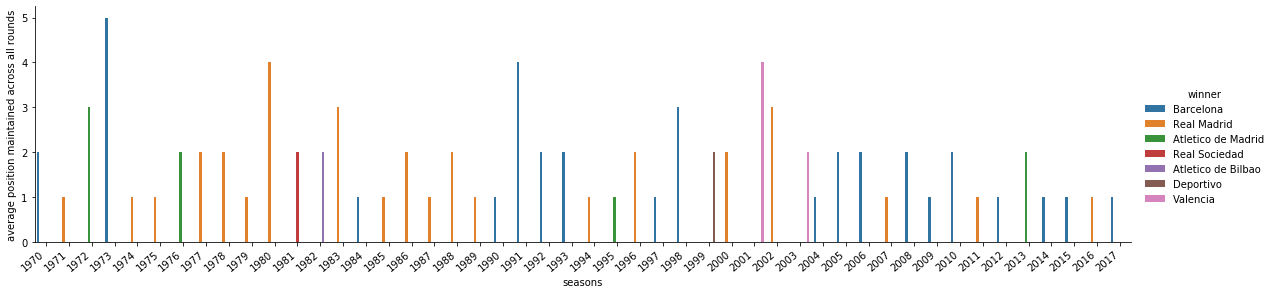

In [18]:
plt.figure(figsize=(16,4))
ax = sns.catplot(x='index',y='average position maintained',hue='winner', hue_order = ['Barcelona','Real Madrid','Atletico de Madrid','Real Sociedad','Atletico de Bilbao','Deportivo','Valencia'],data=winner_df.reset_index(),kind='bar',height = 4, aspect = 4)
ax.set_xticklabels(rotation=40, ha="right")
plt.xlabel('seasons')
plt.ylabel('average position maintained across all rounds')

## Pattern / Fact 3:

1973-74 season was the most competitive season (least points range) in la liga between 1970-71 and 2017-18. The point difference between 16 teams, apart from the first and the last, was only 13 points! That is 0.8 points per postion. Therefore, if a mid-table team won one extra match against the leaders, they would've climbed up by almost 4 positions!

### Data preperation

In [19]:
# df to hold all round wise point tables across all seasons
df3 = pd.DataFrame(data=None,columns = ['season', 'round', 'club','matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
       'points', 'goals_scored', 'goals_conceded',
       'goal_difference'])

for season in season_labels:
    season_rw_dict = season_rw_point_table[season-offset]
    
    for rounds in season_rw_dict.keys():
            df3 = df3.append(season_rw_dict[rounds])

In [20]:
# total number of rounds in a season
df4 = laliga.copy()
season_rounds = df4[['season','round']].groupby(['season']).max().reset_index()
season_rounds = season_rounds.set_index('season',drop=True)

# df to hold final points table of all seasons
seasons_final_table = pd.DataFrame(data=None,columns = ['season', 'round', 'club','matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
       'points', 'goals_scored', 'goals_conceded',
       'goal_difference'])

for season in season_labels:
    rounds = season_rounds.loc[season]
    seasons_final_table = seasons_final_table.append(df3[(df3['season'] == season) & (df3['round'] == int(rounds.values))])

seasons_final_table.tail(n=40) # 2016-17 and 2017-18 seasons

,season,round,club,matches_won,matches_lost,matches_drawn,total_matches,points,goals_scored,goals_conceded,goal_difference
0,2016,38,Real Madrid,29,3,6,38,93,106,41,65
1,2016,38,Barcelona,28,4,6,38,90,116,37,79
2,2016,38,Atletico de Madrid,23,6,9,38,78,70,27,43
3,2016,38,Sevilla,21,8,9,38,72,69,49,20
4,2016,38,Villarreal,19,9,10,38,67,56,33,23
5,2016,38,Real Sociedad,19,12,7,38,64,59,53,6
6,2016,38,Atletico de Bilbao,19,13,6,38,63,53,43,10
7,2016,38,Espanol,15,12,11,38,56,49,50,-1
8,2016,38,Alaves,14,11,13,38,55,41,43,-2
9,2016,38,Eibar,15,14,9,38,54,56,51,5


### Data Analysis

As observed from the box plot, in 1973-74, 16 teams apart from the ones at the top and bottom were seperated by only 13 points.

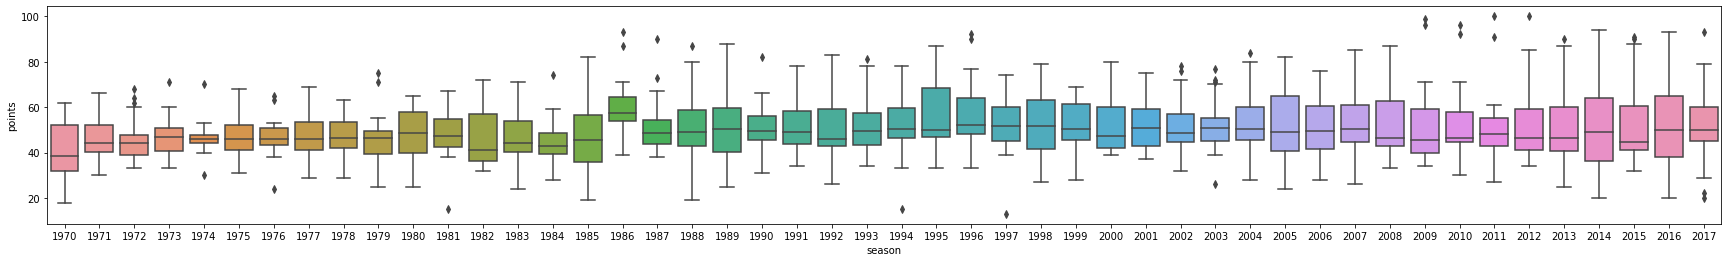

In [21]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x = 'season', y = 'points', data = seasons_final_table)

In [22]:
seasons_final_table[seasons_final_table.season==1974][1:-1]['points'].max() - seasons_final_table[seasons_final_table.season==1974][1:-1]['points'].min()

13

In [9]:
df = pd.DataFrame(spanish_soccer.dtypes).T.rename(index={0:'column type'})
df = df.append(pd.DataFrame(spanish_soccer.isnull().sum()).T.rename(index={0:'null values (nb)'}))
df1 = df.T

In [10]:
df1

,column type,null values (nb)
id,int64,0
season,object,0
division,int64,0
round,int64,0
localTeam,object,0
visitorTeam,object,0
localGoals,int64,0
visitorGoals,int64,0
date,object,0
timestamp,int64,0


In [16]:
df2 = pd.DataFrame(spanish_soccer.isnull().sum()).T
df2

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,timestamp
0,0,0,0,0,0,0,0,0,0,0


column type         int64
null values (nb)        0
Name: id, dtype: object